In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bundl import InfoMander
from bundl.templates import TemplateRenderer

In [26]:
mander = InfoMander('probabl-ai', 'demo-usecase', 'training', '3')

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tic = time.time()
clf = LogisticRegression(random_state=0)
grid = GridSearchCV(clf, param_grid={'C': np.logspace(0.0001, 1, 10), 'random_state': range(10)})
grid.fit(X_train, y_train)
toc = time.time()

In [28]:
mander.add_info('cv_results', grid.cv_results_)

In [29]:
template = """
This dataset has {{n_classes}} classes.

<scatter-chart title='Chart' data='cv_results' x='mean_test_score' y='std_test_score'/>
"""

In [30]:
from bundl.templates import TemplateRenderer

mander.add_view('index', TemplateRenderer(mander).render(template))

In [31]:
import watermark

mander.add_logs('watermark', watermark.watermark().replace('\n','<br>'))

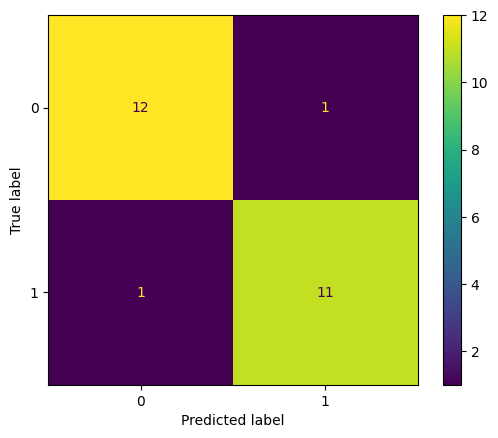

In [32]:
import io
import base64

cm = confusion_matrix(y_test, grid.predict(X_test), labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid.classes_)

disp.plot()

myio = io.BytesIO()
plt.savefig(myio, format='jpg')
myio.seek(0)
base64_img = base64.b64encode(myio.read()).decode()

mander.add_view('confusion_matrix', f'<img src="data:image/png;base64, {base64_img}">')

In [33]:
mander.add_artifact('model', grid)

In [34]:
mander.add_info('train_time', toc - tic)

In [35]:
mander.add_info('X_shape', list(X.shape))
mander.add_info('n_classes', len(set(y)))

In [36]:
mander.fetch().keys()

dict_keys(['X_shape', '_artifacts', '_logs', '_templates', 'cv_results', 'n_classes', 'train_time', 'updated_at'])